In [ ]:
# %pip install progressbar xgboost matplotlib boto3 openpyxl tqdm hydroeval hydrotools

In [ ]:
# hydrological packages
from hydrotools.nwm_client import utils 

# my packages
from evaluation_metric import MAPE, RMSE, KGE, PBias

# basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# system packages
from progressbar import ProgressBar
from datetime import datetime, date
import pickle
import warnings
warnings.filterwarnings("ignore")
import platform
import time

# data analysi packages
from scipy import optimize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# deep learning packages
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
if platform.system() == 'Windows':
    onedrive_path = 'E:/OneDrive/OneDrive - The University of Alabama/10.material/01.data/usgs_data/'
    box_path = 'C:/Users/snaserneisary/Box/NWM-ML/'

elif platform.system() == 'Darwin':
    onedrive_path = '/Users/savalan/Library/CloudStorage/OneDrive-TheUniversityofAlabama/02.projects/03.ciroh/04.data/'
    box_path = '/Users/savalan/Library/CloudStorage/Box-Box/NWM-ML/Data/NWM/ut/'
    
elif platform.system() == 'Linux':
    path_01 = '/home/snaserneisary/01.projects/01.ciroh_p8/NWM-ML/Savalan/'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

In [ ]:
raw_training_data = pd.read_csv(path_01 + '03.output/raw_training_data.csv')
raw_training_data.pop('Unnamed: 0')
raw_training_data['station_id'] = raw_training_data['station_id'].astype('str')
raw_training_data.head()

In [ ]:
Training_DF = raw_training_data.copy()

### Editing the features based on the feature importance should be in the next cell!!!!!!!!!!!!!!!

In [ ]:
# Editing the features based on the feature importance should be done here!!!!!!!!!!!!!!!

Training_DF.drop(['precipitation_in', 'temperature_F', 'Mean_Ann_Precip_in', 'Perc_Herbace', 'Perc_Forest',
                        'Mean_Basin_Elev_ft'], axis=1, inplace=True)



### Remove headwater stations!!!!!!!

In [ ]:
headwater_stations = ['10011500', '10109000', '10113500', '10128500', '10131000', '10146400', '10150500', '10154200',
'10172700', '10172800', '10172952']
Training_DF = Training_DF[~raw_training_data['station_id'].isin(headwater_stations)]

In [ ]:
Training_DF.datetime = pd.to_datetime(Training_DF.datetime)
Training_DF.head()

In [ ]:
x_train_temp = Training_DF[Training_DF.datetime < '01-01-2015']
x_train_temp.pop('station_id')
x_train_temp.pop('datetime')
y_train_temp = x_train_temp['flow_cfs']
x_train_temp.pop('flow_cfs')
x_train_temp.head()

In [ ]:
# Scale the train inputs of the NN model
# First we need to convert it from pandas dataframe to a numpy array 
y_train = y_train_temp.to_numpy()
x_train = x_train_temp.to_numpy()
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
y_scaled_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_scaled_train.shape

In [ ]:
# Determining the test dataset. 
x_test_temp = Training_DF[Training_DF.datetime >= '01-01-2015']
x_test_temp.head()

In [ ]:
# Scale the test inputs of the NN model
# First we need to convert it from pandas dataframe to a numpy array 
x_test_temp_1 = x_test_temp.copy()
station_index_list = x_test_temp_1['station_id']
x_test_temp_1.pop('station_id')
x_test_temp_1.pop('datetime')
y_test_temp_1 = x_test_temp_1['flow_cfs']
x_test_temp_1.pop('flow_cfs')
x_test_1_np = x_test_temp_1.reset_index(drop=True).to_numpy()
y_test_1_np = y_test_temp_1.reset_index(drop=True).to_numpy()
x_test_1_scaled = scaler.fit_transform(x_test_1_np)
y_scaled_test_1 = scaler.fit_transform(y_test_1_np.reshape(-1, 1))

In [ ]:
# MLP

n_targets = 1
tries = 10
cri_temp_nse = np.zeros([3, n_targets, tries])
cri_temp_rmse = np.zeros([3, n_targets, tries])
cri_temp_r2 = np.zeros([3, n_targets, tries])
cri_temp_kge = np.zeros([3, n_targets, tries])
cri_temp_lognse = np.zeros([3, n_targets, tries])
print('finish')

In [ ]:
# Reshape input for MLP model
x_train_scaled_test = torch.Tensor(x_train_scaled)
y_train_scaled_test = torch.Tensor(y_scaled_train)
print('test shape', x_train_scaled_test.shape)
print('train shape', y_train_scaled_test.shape)

In [ ]:
# Take data to the proper device (GPU or CPU)
# x_train_scaled_test = x_train_scaled_test.to(device)
# y_train_scaled_test = y_train_scaled_test.to(device)

In [ ]:
# # Hyperparameters
# epochs = 100
# batch_size = 100
# learning_rate = 0.001
# decay = 1e-2
# validation_split = 0.2
# neurons = 150
# LD1=128
# LD2=128
# LD3=64
# LD4=64
# LD5=32
# LD6=16
# LD7=5

In [ ]:
# start_time = time.time()

# # Create PyTorch datasets and dataloaders
# train_dataset = TensorDataset(x_train_scaled_test, y_train_scaled_test)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# # Build the model
# model = nn.Sequential(
#     nn.Linear(x_test_1_scaled.shape[1], LD1),
#     nn.ReLU(),
#     nn.Linear(LD1, LD2),
#     nn.ReLU(),
#     nn.Linear(LD2, LD3),
#     nn.ReLU(),
#     nn.Linear(LD3, LD4),
#     nn.ReLU(),
#     nn.Linear(LD4, LD5),
#     nn.ReLU(),
#     nn.Linear(LD5, LD6),
#     nn.ReLU(),
#     nn.Linear(LD6, 1)
# ).to(device)

# # Define loss and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(epochs):
#     total_loss = 0.0
#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")
# print('finish')
# print("Run Time:" + " %s seconds " % (time.time() - start_time))
# #save model
# #torch.save(model.state_dict(), f"./mlp_models/mlp_model.pkl")

In [ ]:
# # Build and load the model
device = torch.device('cpu') # for some reason had to change to cpu
models = nn.Sequential(
    nn.Linear(x_test_1_scaled.shape[1], LD1),
    nn.ReLU(),
    nn.Linear(LD1, LD2),
    nn.ReLU(),
    nn.Linear(LD2, LD3),
    nn.ReLU(),
    nn.Linear(LD3, LD4),
    nn.ReLU(),
    nn.Linear(LD4, LD5),
    nn.ReLU(),
    nn.Linear(LD5, LD6),
    nn.ReLU(),
    nn.Linear(LD6, 1)
).to(device)

models.load_state_dict(torch.load(f"{path_01}03.output/mlp/mlp_model.pkl", map_location=torch.device('cpu')))

EvalDF = pd.DataFrame(columns = cols)
SupplyEvalDF = pd.DataFrame(columns = supcols)

SitesDict = {}

for station_number in station_index_list.drop_duplicates():
    index = station_index_list == station_number # Finind the rows that have this station number.
    X_test_scaled = torch.Tensor(x_test_1_scaled[index])
    
    # Evaluation
    models.eval()
    with torch.no_grad():
        yhat_test= models(X_test_scaled)

    # Invert scaling for actual
    inv_yhat_test = scaler.inverse_transform(yhat_test.numpy())
    inv_yhat_test[inv_yhat_test<0] = 0 # THIS IS NOT CORRECT !!!!!!!!!!!!!!!
    nwm_test = pd.DataFrame(inv_yhat_test, columns=['MLP_flow'])
    Dfs = [nwm_test.reset_index(drop=True), x_test_temp[index].reset_index(drop=True)]

    #get reach id for model eval
    nhdreach = utils.crosswalk(usgs_site_codes=station_number)
    nhdreach = nhdreach['nwm_feature_id'].iloc[0]
    
    #save predictions
    mod = 'MLP'
    save_path = f"./Predictions/Hindcast/{mod}/{mod}_{nhdreach}.csv"
    #nwm_test.to_csv(save_path)
    
    # merge
    Eval_DF_mine = pd.concat(Dfs, axis=1)
    SitesDict[nhdreach] = Eval_DF_mine

    
    prediction_columns = ['NWM_flow', 'MLP_flow']
    observation_column = 'flow_cfs'
    
    #Get RMSE from the model
    rmse = RMSE(Eval_DF_mine, prediction_columns, observation_column)

    #Get Mean Absolute Percentage Error from the model
    mape = MAPE(Eval_DF_mine, prediction_columns, observation_column)

    #Get Percent Bias from the model
    pbias = PBias(Eval_DF_mine, prediction_columns, observation_column)

    #Get Kling-Gutz Efficiency from the model
    kge = KGE(Eval_DF_mine, prediction_columns, observation_column)
    
    #Get Volumetric values
    Eval_DF_mine.set_index('datetime', inplace = True, drop =True)
    flowcols = [f"{mod}_flow", 'flow_cfs', 'NWM_flow']
    SupplyEval = Eval_DF_mine[flowcols].copy()
    SupplyEval = SupplyEval*cfsday_AFday
    #set up cumulative monthly values
    SupplyEval['Year'] = SupplyEval.index.year

    for site in flowcols:
        SupplyEval[site] = SupplyEval.groupby(['Year'])[site].cumsum()  

    EOY_mod_vol_af = SupplyEval[f"{mod}_flow"].iloc[-1]
    EOY_obs_vol_af = SupplyEval["flow_cfs"].iloc[-1]
    EOY_nwm_vol_af = SupplyEval[f"NWM_flow"].iloc[-1]
    NWM_vol_diff_af = EOY_nwm_vol_af - EOY_obs_vol_af
    Mod_vol_diff_af = EOY_mod_vol_af - EOY_obs_vol_af
    NWM_Perc_diff = (NWM_vol_diff_af/EOY_obs_vol_af)*100
    Mod_Perc_diff = (Mod_vol_diff_af/EOY_obs_vol_af)*100
    
     #Get Performance Metrics from the model
    Srmse = RMSE(SupplyEval, prediction_columns, observation_column)
    Smape = MAPE(SupplyEval, prediction_columns, observation_column)
    Spbias = PBias(SupplyEval, prediction_columns, observation_column)
    Skge = KGE(SupplyEval, prediction_columns, observation_column)
    
    
    #save model performance
    sitestats = [station_number, nhdreach, rmse[0], rmse[1],  pbias[0], pbias[1], kge[0], kge[1], mape[0],mape[1]]
    EvalDF.loc[len(EvalDF)] = sitestats
    
    Supplystats = [station_number, nhdreach, Srmse[0], Srmse[1],  Spbias[0], Spbias[1], Skge[0], Skge[1], Smape[0],  
                 Smape[1],EOY_obs_vol_af, EOY_nwm_vol_af,EOY_mod_vol_af,NWM_vol_diff_af,Mod_vol_diff_af, NWM_Perc_diff, Mod_Perc_diff ]
    SupplyEvalDF.loc[len(SupplyEvalDF)] = Supplystats
    
    
    
    
    #put prediction DF into dictionary
    # Eval_DF_mine.reset_index(inplace = True)
    # Eval_DF_mine.sort_values(by=['datetime'], inplace=True)
    # Eval_DF_mine.set_index('datetime', inplace = True)
    
    
    
#save model results
#EvalDF.to_csv(f"./Predictions/Hindcast/{mod}/{mod}_Performance.csv")   
#SupplyEvalDF.to_csv(f"./Predictions/Hindcast/{mod}/{mod}_Supply_Performance.csv")

print('finish')


In [ ]:
# MODEL CLASS
import torch
import torch.nn as nn
import torch.optim as optim

class CustomMLP(nn.Module):
    def __init__(self, layer_sizes, device=None):
        super(CustomMLP, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
        self.loss_function = nn.MSELoss()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu") if device is None else device
        self.to(self.device)
        self.validation_indicator = 0

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = torch.relu(self.layers[i](x))
        x = self.layers[-1](x)
        return x

    def train_model(self, train_loader, epochs, early_stopping_patience, learning_rate=None, save_path=None, val_loader=None):
        best_val_loss = float('inf')
        epochs_no_improve = 0
        optimizer = optim.Adam(self.layers.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            self.train()  # Set the model to training mode
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                optimizer.zero_grad()
                outputs = self.forward(inputs)
                loss = self.loss_function(outputs, targets)
                loss.backward()
                optimizer.step()

            
            val_loss = 0
            if val_loader is not None:
                self.validation_indicator = 1
                val_loss = self.evaluate_model(val_loader)

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    torch.save(self.state_dict(), save_path)
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1

                # if epochs_no_improve == early_stopping_patience:
                #     print('Early stopping triggered')
                #     break
            print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}', f'Validation Loss: {val_loss}')
        self.validation_indicator = 0
        print('Training is done!')

    def evaluate_model(self, data_loader):
        self.eval()  # Set the model to evaluation mode
        total_loss = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in data_loader:
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                outputs = self.forward(inputs)
                loss = self.loss_function(outputs, targets)
                total_loss += loss.item() * inputs.size(0)
                total += inputs.size(0)
        avg_loss = total_loss / total
        if self.validation_indicator == 0:
            print(f'Validation Loss: {avg_loss}')
        return outputs if self.validation_indicator == 0 else avg_loss

    def save_model(self, file_path):
        torch.save(self.state_dict(), file_path)

    def load_model(self, file_path):
        self.load_state_dict(torch.load(file_path, map_location=self.device))

# Example Usage:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CustomMLP(layer_sizes, learning_rate=0.01, device=device)
# model.train_model(train_loader, epochs=5, val_loader=val_loader, early_stopping_patience=5, save_path='best_model.pth')
# model.load_model('best_model.pth')


In [ ]:
# I should modify the model evauation and testing part. 

In [ ]:
# %load_ext autoreload
# %autoreload 2
mod='MLP'
epochs = 200
batch_size = 100
learning_rate = 0.001
early_stopping_patience=5
decay = 1e-2
path_model_parameters = f"{path_01}03.output/best_model.pkl"
#path_01 + '03.output/best_model.pkl'
layer_sizes = [x_train_scaled_test.shape[1] ,128, 128, 64, 64, 32, 16, 5, 1]
# neurons = 150
# LD1=128
# LD2=128
# LD3=64
# LD4=64
# LD5=32
# LD6=16
# LD7=5
# validation_split = 0.2

# I should add decay


In [ ]:
# Create PyTorch datasets and dataloaders

#X_train, X_valid, y_train, y_valid = train_test_split(x_train_scaled_test, y_train_scaled_test)

train_dataset = TensorDataset(x_train_scaled_test, y_train_scaled_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
# validation_dataset = TensorDataset(X_valid, y_valid)
# validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
mlp_model = CustomMLP(layer_sizes, device)

In [ ]:
mlp_model.train_model(train_loader, epochs, early_stopping_patience, learning_rate, path_model_parameters)

In [ ]:
mlp_model.load_model(path_model_parameters)

In [ ]:
from evalaution_table import evtab

EvalDF = np.zeros([len(station_index_list.drop_duplicates()), 10])
SupplyEvalDF = np.zeros([len(station_index_list.drop_duplicates()), 17])

SitesDict = {}



for station_index, station_number in enumerate(station_index_list.drop_duplicates()):
    index = station_index_list == station_number # Finind the rows that have this station number.
    temp_x_scaled_test = torch.Tensor(x_test_1_scaled)
    temp_y_scaled_test = torch.Tensor(y_scaled_test_1)
    index_np = torch.tensor(index.to_numpy())

    test_dataset = TensorDataset(temp_x_scaled_test[index_np], temp_y_scaled_test[index_np])
    test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0], shuffle=False)
    
    # Evaluation
    yhat_test = mlp_model.evaluate_model(test_loader)
    
    # Invert scaling for actual
    inv_yhat_test = scaler.inverse_transform(yhat_test.numpy())
    inv_yhat_test[inv_yhat_test<0] = 0 # THIS IS NOT CORRECT !!!!!!!!!!!!!!!
    nwm_test = pd.DataFrame(inv_yhat_test, columns=['MLP_flow'])
    Dfs = [nwm_test.reset_index(drop=True), x_test_temp[index].reset_index(drop=True)]

    #get reach id for model eval
    nhdreach = utils.crosswalk(usgs_site_codes=station_number)
    nhdreach = nhdreach['nwm_feature_id'].iloc[0]
    
    #save predictions
    #save_path = f"./Predictions/Hindcast/{mod}/{mod}_{nhdreach}.csv"
    #nwm_test.to_csv(save_path)
    
    # merge
    Eval_DF_mine = pd.concat(Dfs, axis=1)
    SitesDict[nhdreach] = Eval_DF_mine
    prediction_columns = ['NWM_flow', f"{mod}_flow"]
    observation_column = 'flow_cfs'
    result = evtab(Eval_DF_mine, prediction_columns, nhdreach, observation_column, mod)
    
    #save model performance
    EvalDF[station_index, :] = result[0]
    SupplyEvalDF[station_index, :] = result[1]
    
    

print('finish')


In [ ]:
from evalaution_table import evtab
# # Build and load the model
device = torch.device('cpu') # for some reason had to change to cpu
models = nn.Sequential(
    nn.Linear(x_test_1_scaled.shape[1], LD1),
    nn.ReLU(),
    nn.Linear(LD1, LD2),
    nn.ReLU(),
    nn.Linear(LD2, LD3),
    nn.ReLU(),
    nn.Linear(LD3, LD4),
    nn.ReLU(),
    nn.Linear(LD4, LD5),
    nn.ReLU(),
    nn.Linear(LD5, LD6),
    nn.ReLU(),
    nn.Linear(LD6, 1)
).to(device)

models.load_state_dict(torch.load(f"{path_01}03.output/mlp/mlp_model.pkl", map_location=torch.device('cpu')))

EvalDF = np.zeros([len(tation_index_list.drop_duplicates()), 10])
SupplyEvalDF = np.zeros([len(tation_index_list.drop_duplicates()), 10])

SitesDict = {}

for station_index, station_number in enumerate(station_index_list.drop_duplicates()):
    index = station_index_list == station_number # Finind the rows that have this station number.
    X_test_scaled = torch.Tensor(x_test_1_scaled[index])
    
    # Evaluation
    models.eval()
    with torch.no_grad():
        yhat_test= models(X_test_scaled)

    # Invert scaling for actual
    inv_yhat_test = scaler.inverse_transform(yhat_test.numpy())
    inv_yhat_test[inv_yhat_test<0] = 0 # THIS IS NOT CORRECT !!!!!!!!!!!!!!!
    nwm_test = pd.DataFrame(inv_yhat_test, columns=['MLP_flow'])
    Dfs = [nwm_test.reset_index(drop=True), x_test_temp[index].reset_index(drop=True)]

    #get reach id for model eval
    nhdreach = utils.crosswalk(usgs_site_codes=station_number)
    nhdreach = nhdreach['nwm_feature_id'].iloc[0]
    
    #save predictions
    save_path = f"./Predictions/Hindcast/{mod}/{mod}_{nhdreach}.csv"
    #nwm_test.to_csv(save_path)
    
    # merge
    Eval_DF_mine = pd.concat(Dfs, axis=1)
    SitesDict[nhdreach] = Eval_DF_mine
    prediction_columns = ['NWM_flow', f"{mod}_flow"]
    observation_column = 'flow_cfs'
    result = evtab(Eval_DF_mine, prediction_columns, nhdreach, observation_column, mod)
    
    #save model performance
    EvalDF[station_index, :] = temp[0]
    SupplyEvalDF[station_index, :] = temp[1]
    
    

print('finish')


In [ ]:
#put the model scores into a dataframe for comparison
mod = 'MLP'
#Evaluation columns for prediction time series
cols = ['USGSid', 'NHDPlusid', 'NWM_rmse', f"{mod}_rmse", 'NWM_pbias', f"{mod}_pbias", 
        'NWM_kge', f"{mod}__kge", 'NWM_mape',  f"{mod}_mape"]

#Evaluation columns for accumulated supply time series
supcols = ['USGSid', 'NHDPlusid', 'NWM_rmse', f"{mod}_rmse", 'NWM_pbias', f"{mod}_pbias", 
        'NWM_kge', f"{mod}__kge", 'NWM_mape',  f"{mod}_mape", 'Obs_vol', 'NWM_vol', f"{mod}_vol",
        'NWM_vol_err', f"{mod}_vol_err", 'NWM_vol_Perc_diff', f"{mod}_vol_Perc_diff"]
    
#save model results
EvalDF = pd.DataFrame(EvalDF, columns=cols)
SupplyEvalDF = pd.DataFrame(SupplyEvalDF, columns=supcols)

#EvalDF.to_csv(f"./Predictions/Hindcast/{mod}/{mod}_Performance.csv")   
#SupplyEvalDF.to_csv(f"./Predictions/Hindcast/{mod}/{mod}_Supply_Performance.csv")


In [ ]:
# I should change EvalDf and SupplyEvalDF to numpy arrays and make class for the models


In [ ]:
print("Model Performance for Daily cfs")
display(EvalDF)   
print("Model Performance for Daily Accumulated Supply (Acre-Feet)")
display(SupplyEvalDF )

In [ ]:
print("Model Performance for Daily cfs")
display(EvalDF)   
print("Model Performance for Daily Accumulated Supply (Acre-Feet)")
display(SupplyEvalDF )

In [ ]:
#save model results
EvalDF.to_csv(f"./Predictions/Hindcast/{mod}/{mod}_Performance.csv")

In [ ]:
import importlib
importlib.reload(FigureGenerator)

In [ ]:
import FigureGenerator

model = 'MLP'
plotname = 'MLP_TS_plot'
freq = 'D'
supply = True
title = 'Observed and Modeled flows for NHDPlus Reaches \n with Upstream Reservoirs in the Great Salt Lake Basin'
FigureGenerator.TS_plot(SitesDict, model, plotname, title, freq, supply)

In [ ]:
plotname = 'MLP_ParityPlot'
FigureGenerator.Parity_plot(SitesDict, model, plotname)

In [ ]:
import AWS_transfer
model = 'MLP'
state = 'ut'
AWS_transfer.Predictions2AWS(model, state)

In [ ]:
reach = 10273232
variables =['NWM_flow', 'Obs_flow']
colors = ['blue', 'green']
model = 'MLP'
plotname = 'NWMFlow'
units = 'cfs'
y_lab = f"Flow ({units})"
title = f"Daily NWM Estimates \n Reach: {str(reach)}"


FigureGenerator.Var_TS_plot(SitesDict, reach, variables, colors, model,y_lab, plotname, title, units, supply = False)

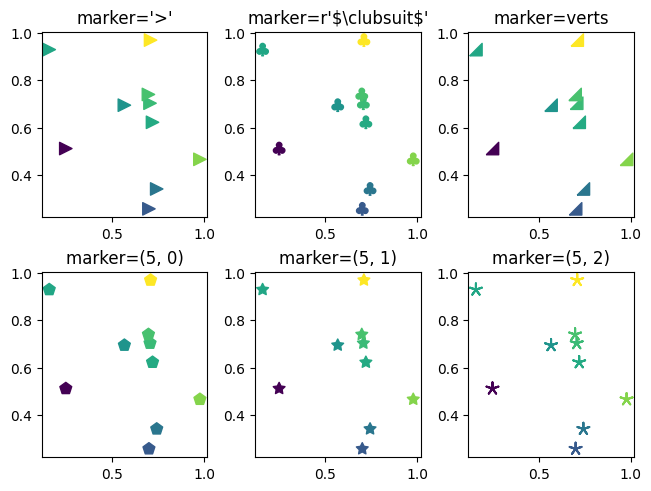

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

fig, axs = plt.subplots(2, 3,layout="constrained")

# Matplotlib marker symbol
axs[0, 0].scatter(x, y, s=80, c=z, marker=">")
axs[0, 0].set_title("marker='>'")

# marker from TeX: passing a TeX symbol name enclosed in $-signs
axs[0, 1].scatter(x, y, s=80, c=z, marker=r"$\clubsuit$")
axs[0, 1].set_title(r"marker=r'\$\clubsuit\$'")

# marker from path: passing a custom path of N vertices as a (N, 2) array-like
verts = [[-1, -1], [1, -1], [1, 1], [-1, -1]]
axs[0, 2].scatter(x, y, s=80, c=z, marker=verts)
axs[0, 2].set_title("marker=verts")

# regular pentagon marker
axs[1, 0].scatter(x, y, s=80, c=z, marker=(5, 0))
axs[1, 0].set_title("marker=(5, 0)")

# regular 5-pointed star marker
axs[1, 1].scatter(x, y, s=80, c=z, marker=(5, 1))
axs[1, 1].set_title("marker=(5, 1)")

# regular 5-pointed asterisk marker
axs[1, 2].scatter(x, y, s=80, c=z, marker=(5, 2))
axs[1, 2].set_title("marker=(5, 2)")

plt.show()


In [27]:
n_subplots

7

0
1
2
3
4
5
6
7
8


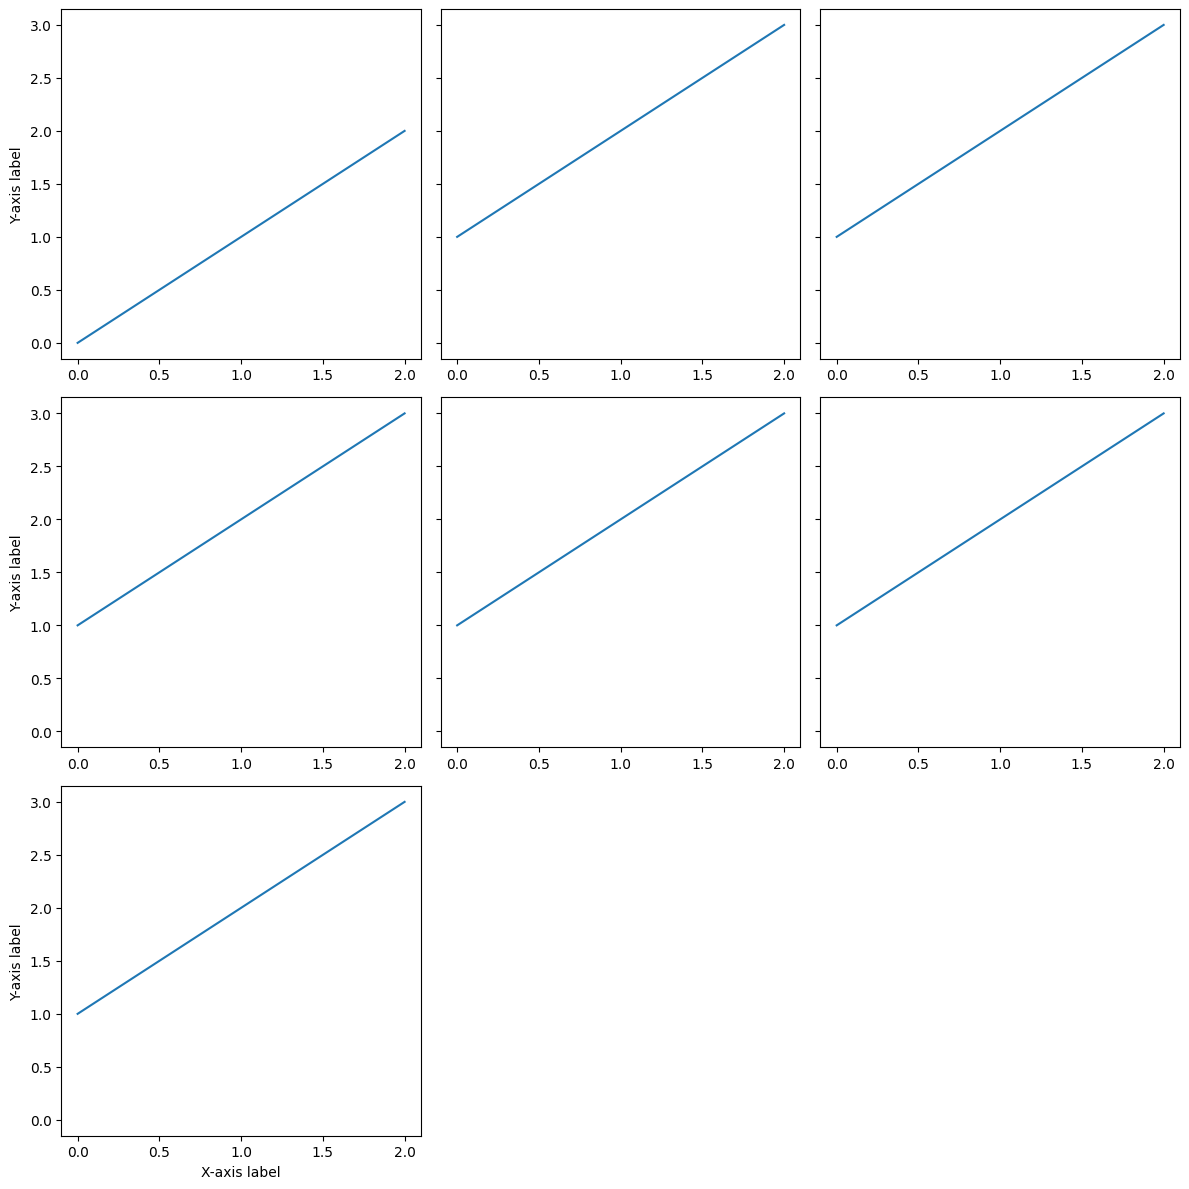

In [33]:
import matplotlib.pyplot as plt
import math

# Example usage
datasets = [
    ([0, 1, 2], [0, 1, 2]),
    ([0, 1, 2], [1, 2, 3]),
    ([0, 1, 2], [1, 2, 3]),
    ([0, 1, 2], [1, 2, 3]),
    ([0, 1, 2], [1, 2, 3]),
    ([0, 1, 2], [1, 2, 3]),
    ([0, 1, 2], [1, 2, 3]),
    # Add more dataset pairs as needed
]
figsize=(12, 12)
n_subplots = len(datasets)
n_cols = int(math.ceil(math.sqrt(n_subplots)))
n_rows = int(math.ceil(n_subplots / n_cols))


# Using sharey=True to share the Y-axis across each row
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, ax in enumerate(axes):
    print(i)
    if i < n_subplots:
        ax.plot(datasets[i][0], datasets[i][1])

        if i // n_cols == n_rows - 1:
            ax.set_xlabel('X-axis label')


        if i % n_cols == 0:
            ax.set_ylabel('Y-axis label')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

